<a href="https://colab.research.google.com/github/romaniuk-o/Python_Data_Science_HW6/blob/main/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import random
import pyspark
from pyspark.sql import SparkSession, functions as f
from matplotlib import pyplot as plt
import seaborn as sns


**Завдання 1#**

У цьому завданні вам потрібно завантажити ось цей датасет. Ми з вами вже працювали з ним коли вивчали pandas. Це все також Топ-50 книг, що найбільше продаються на Amazon в період з 2009 по 2019 роки. Потрібно виконати наступне:

Створити спарк сесію.

In [107]:
spark_session = SparkSession.builder.getOrCreate()

Прочитати датасет в датафрейм.

In [108]:
df = spark_session.read.csv("bestsellers_with_categories.csv",header=True, inferSchema=True)
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|


Використовуючи тільки RDD, обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7


In [109]:
df2 = df.alias('df')


a_dict = {'Name':'name', 'Author':'author','User rating' : 'user_rating', 
          'Reviews' :'reviews', 'Price' :'price', 'Year' : 'year', 'Genre' : 'genre'  }

for key, value in a_dict.items():
    df2= df.withColumnRenamed(key, value)

df2.show()


df3 = (df2.filter(f.col('User Rating') > 4.7)).agg({'Price':'mean'}).show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

Побудувати гістограму розподілу рецензій (стовпчик Reviews).

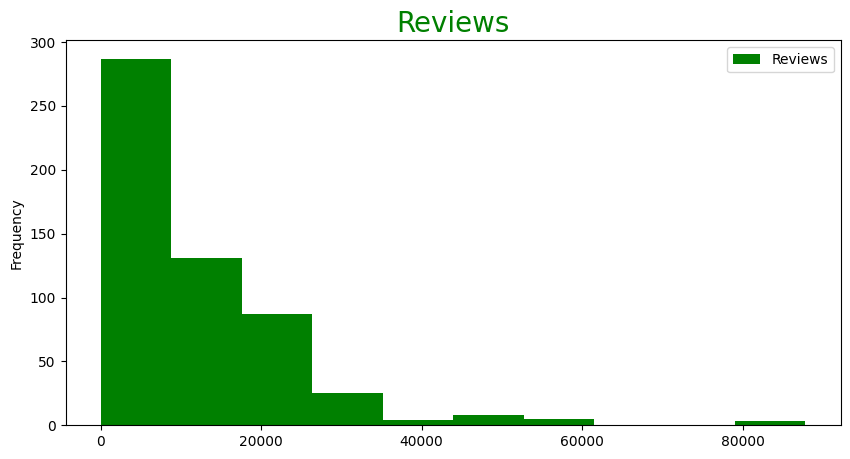

In [110]:
df4 = df2['Author','Reviews'].toPandas()
df4['Reviews'] = df4[['Reviews']].astype(float)
df4.plot.hist(y='Reviews',color='g', figsize=(10, 5), bins=10)
plt.title('Reviews', fontsize=20, color='g')
plt.show()

Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".

In [111]:
df5 = df['User Rating', 'Reviews', 'Price'].toPandas()
df5.corr()    

     

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


Використовуючи бібліотеку seaborn, побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".

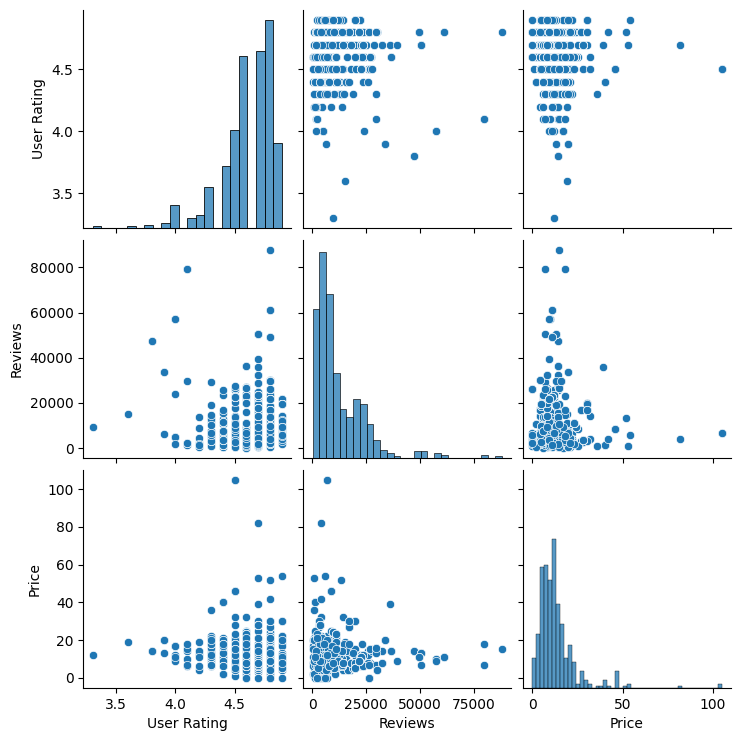

In [114]:
sns.pairplot(df5);

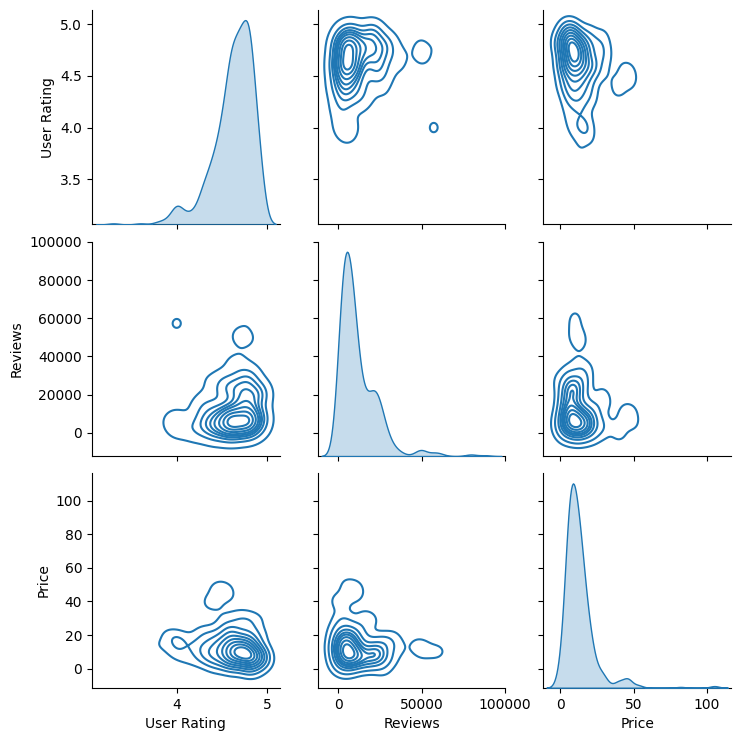

In [115]:
sns.pairplot(df5, kind="kde");

### **Завдання 2**

Під час виконання цього завдання дозволяється використовувати лише Spark SQL. Для датасету з попереднього завдання виконайте наступне:


Знайдіть автора з найвищим рейтингом.

Знайдіть трьох авторів із найнижчим рейтингом.

Визначте, який автор отримав найбільшу кількість рецензій.

Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.

Визначте, яка книга жанру "Fiction" має найменший рейтинг.

Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.